In [3]:
import pandas as pd
data = pd.read_csv("stock.csv")
data.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,01-06-2025,AAPL,185.96,187.79,188.85,183.74,42257183,2.931360e+12,28.37,0.49,6.62,248.20,155.68,Technology
1,01-06-2025,ABBV,189.63,193.64,194.31,188.03,33074970,3.289230e+11,16.74,3.51,11.57,210.83,127.91,Healthcare
2,01-06-2025,ABT,118.79,120.08,120.53,118.01,17130934,2.001330e+11,19.39,1.84,6.19,140.79,99.26,Healthcare
3,01-06-2025,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology
4,01-06-2025,ADP,253.46,255.60,258.59,249.91,10319559,1.052470e+11,29.92,2.04,8.54,303.75,234.28,Financials


In [4]:
data.keys()

Index(['Date', 'Ticker', 'Open Price', 'Close Price', 'High Price',
       'Low Price', 'Volume Traded', 'Market Cap', 'PE Ratio',
       'Dividend Yield', 'EPS', '52 Week High', '52 Week Low', 'Sector'],
      dtype='object')

In [5]:
data = data.sort_values(by=['Ticker', 'Date'])
data['Target'] = data.groupby('Ticker')['Close Price'].shift(-1)
data['Target']

0       190.24
2460    213.07
82      183.06
2542    195.61
164     218.45
         ...  
2131    147.67
2213    143.61
2295    146.85
2377    153.90
2459       NaN
Name: Target, Length: 4346, dtype: float64

In [6]:
data.isnull().sum()

Date               0
Ticker             0
Open Price         0
Close Price        0
High Price         0
Low Price          0
Volume Traded      0
Market Cap         0
PE Ratio           0
Dividend Yield     0
EPS                0
52 Week High       0
52 Week Low        0
Sector             0
Target            82
dtype: int64

In [7]:
data["Target"].shape

(4346,)

In [8]:
data = data.dropna(subset=['Target'])
data["Target"].shape

(4264,)

In [9]:
data.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
Target            0
dtype: int64

In [10]:
features = ['Open Price','High Price','Low Price','Close Price','Volume Traded',
            'Market Cap','PE Ratio','Dividend Yield','EPS','52 Week High','52 Week Low']

In [11]:
data.keys()

Index(['Date', 'Ticker', 'Open Price', 'Close Price', 'High Price',
       'Low Price', 'Volume Traded', 'Market Cap', 'PE Ratio',
       'Dividend Yield', 'EPS', '52 Week High', '52 Week Low', 'Sector',
       'Target'],
      dtype='object')

In [12]:
x = data[features]
y = data['Target']

In [13]:
from sklearn.model_selection import train_test_split , learning_curve

x_train , x_test , y_train , y_test = train_test_split( x ,y , test_size = 0.2 , shuffle = False )

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept=True)

In [16]:
LR.fit(x_train_scaled ,y_train)

LinearRegression()

In [17]:
pred = LR.predict(x_test_scaled)

In [18]:
from sklearn.metrics import mean_absolute_error , mean_squared_error ,r2_score

print(f"MSE : {mean_squared_error(pred,y_test)}  , MAE : {mean_absolute_error(pred,y_test)} ")

MSE : 114.34488228603654  , MAE : 7.56648649039132 


In [19]:
mae_percent = (7.56 / y.mean()) * 100
print(mae_percent)

2.2370390749154905


In [20]:
import numpy as np
train_sizes, train_scores, val_scores = learning_curve( LR, scaler.fit_transform(x),y,
                                                        cv=5, scoring="r2",
                                                        train_sizes=np.linspace(0.1, 1.0, 10) )

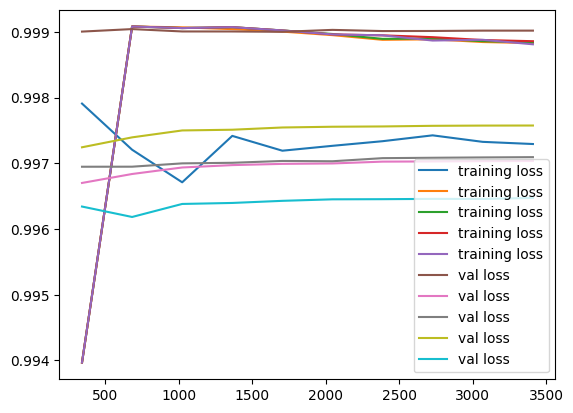

In [21]:
import matplotlib.pyplot as plt
plt.plot(train_sizes , train_scores , label ="training loss")
plt.plot(train_sizes , val_scores , label ="val loss")
plt.legend()

In [22]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(
    n_estimators=300,     
    max_depth=10,       
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

RF.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [23]:
y_pred = RF.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)

MSE : 151.7906408025912
RMSE: 12.320334443617641
MAE : 9.029642633381789
R2  : 0.9952938143068797


In [24]:
sample_input = [[ 1520, 1545, 1508, 1532, 1250000, 850000000000, 28.5, 1.2, 54.3, 1650, 1200 ]]
LR_pred = LR.predict(sample_input)
RF_pred = RF.predict(sample_input)
print( f"LR : {LR_pred[0] :.3f}  RF : {RF_pred[0] :.3f}" )

LR : -173391222659.498  RF : 1623.464


C:\Users\Aarti\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#### here you see the LR model not trained good enough(underfitted) but we can see the RF model is well fitted so we'll use RF model.

In [25]:
import pickle

with open("stock_model.pkl", "wb") as f:
    pickle.dump(RF, f)
